# Demo 1 - Implementações de GANs padrão usando camadas totalmente conectadas e a biblioteca Keras (Dataset MNIST - Dígitos Manuscritos)

- Dados

Redimensionando as imagens MNIST entre -1 e 1.

- Gerador

Rede neural simples totalmente conectada, ativação LeakyReLU e BatchNormalization.

A entrada para o gerador é chamada de 'amostra latente' (100 valores), que é uma série de números gerados aleatoriamente, e produz 784 (= 28x28) pontos de dados que representam uma imagem de dígito. Utilizaremos a distribuição normal.

A última ativação é tanh.

- Discriminador

Rede neural simples totalmente conectada e ativação LeakyReLU.

A última ativação é sigmóide.

- Perda

binary_crossentropy

- Otimizador

Adam (lr = 0,0002, beta_1 = 0,5) batch_size = 64 épocas = 100



In [0]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from keras import initializers

Using TensorFlow backend.


In [0]:
# Carregando nosso dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


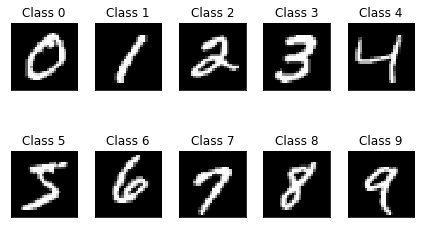

In [0]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [0]:
print('X_train.shape', X_train.shape)

# Transformando nossas imagens de entrada

X_train = X_train.reshape(60000, 28*28)

# Normalizando nossas entradas entre (-1, 1)

X_train = (X_train.astype('float32') / 255 - 0.5) * 2

print('X_train reshape:', X_train.shape)

X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


In [0]:
# Dimensão de espaço latente

latent_dim = 100

# Dimensão da imagem 28x28

img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Rede geradora

generator = Sequential()

# Camada de entra e camada escondida 1

generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada escondida 2

generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada escondida 3

generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada de saída (output) 

generator.add(Dense(img_dim, activation='tanh'))


W0814 17:07:45.815459 140172835493760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 17:07:45.854862 140172835493760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 17:07:45.861818 140172835493760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0814 17:07:45.949977 140172835493760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0814 17:07:45.969174 14

In [0]:
# prints a summary representation of your model

generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               12928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
__________

In [0]:
# Discriminator network
discriminator = Sequential()

# Input layer and hidden layer 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Hidden layer 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Output layer
discriminator.add(Dense(1, activation='sigmoid'))

In [0]:
# prints a summary representation of your model
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total para

In [0]:
# Optimizer
optimizer = Adam(lr=0.0002, beta_1=0.5)

discriminator.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

W0814 17:07:46.356908 140172835493760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 17:07:46.366156 140172835493760 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [0]:
# prints a summary representation of your model
d_g.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 784)               583312    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 265601    
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


epoch = 1/100, d_loss=0.699, g_loss=1.461                                                                                                     


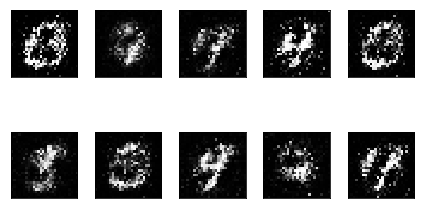

epoch = 2/100, d_loss=0.604, g_loss=1.485                                                                                                     
epoch = 3/100, d_loss=0.652, g_loss=1.324                                                                                                     
epoch = 4/100, d_loss=0.587, g_loss=1.360                                                                                                     
epoch = 5/100, d_loss=0.592, g_loss=1.211                                                                                                     
epoch = 6/100, d_loss=0.521, g_loss=1.174                                                                                                     
epoch = 7/100, d_loss=0.586, g_loss=1.195                                                                                                     
epoch = 8/100, d_loss=0.548, g_loss=1.147                                                                                                     

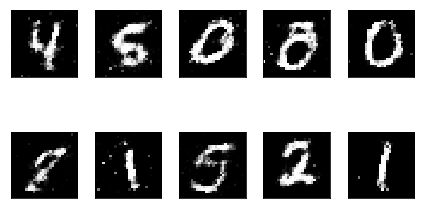

epoch = 12/100, d_loss=0.627, g_loss=1.056                                                                                                     
epoch = 13/100, d_loss=0.587, g_loss=1.010                                                                                                     
epoch = 14/100, d_loss=0.592, g_loss=1.016                                                                                                     
epoch = 15/100, d_loss=0.588, g_loss=1.017                                                                                                     
epoch = 16/100, d_loss=0.595, g_loss=1.054                                                                                                     
epoch = 17/100, d_loss=0.598, g_loss=1.145                                                                                                     
epoch = 18/100, d_loss=0.613, g_loss=1.051                                                                                              

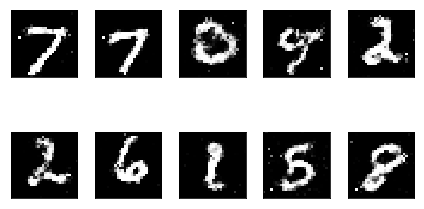

epoch = 22/100, d_loss=0.616, g_loss=1.063                                                                                                     
epoch = 23/100, d_loss=0.628, g_loss=1.144                                                                                                     
epoch = 24/100, d_loss=0.617, g_loss=1.119                                                                                                     
epoch = 25/100, d_loss=0.598, g_loss=1.097                                                                                                     
epoch = 26/100, d_loss=0.578, g_loss=1.144                                                                                                     
epoch = 27/100, d_loss=0.608, g_loss=1.126                                                                                                     
epoch = 28/100, d_loss=0.589, g_loss=1.095                                                                                              

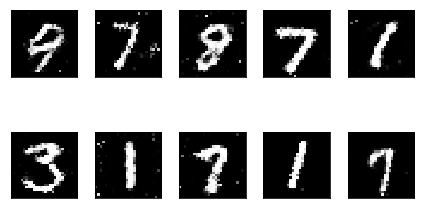

epoch = 32/100, d_loss=0.612, g_loss=1.191                                                                                                     
epoch = 33/100, d_loss=0.593, g_loss=1.101                                                                                                     
epoch = 34/100, d_loss=0.563, g_loss=1.173                                                                                                     
epoch = 35/100, d_loss=0.587, g_loss=1.243                                                                                                     
epoch = 36/100, d_loss=0.578, g_loss=1.174                                                                                                     
epoch = 37/100, d_loss=0.604, g_loss=1.183                                                                                                     
epoch = 38/100, d_loss=0.520, g_loss=1.294                                                                                              

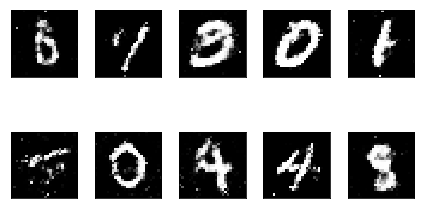

epoch = 42/100, d_loss=0.574, g_loss=1.237                                                                                                     
epoch = 43/100, d_loss=0.571, g_loss=1.260                                                                                                     
epoch = 44/100, d_loss=0.550, g_loss=1.273                                                                                                     
epoch = 45/100, d_loss=0.540, g_loss=1.153                                                                                                     
epoch = 46/100, d_loss=0.556, g_loss=1.330                                                                                                     
epoch = 47/100, d_loss=0.578, g_loss=1.223                                                                                                     
epoch = 48/100, d_loss=0.503, g_loss=1.264                                                                                              

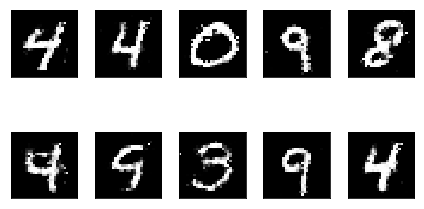

epoch = 52/100, d_loss=0.580, g_loss=1.297                                                                                                     
epoch = 53/100, d_loss=0.558, g_loss=1.350                                                                                                     
epoch = 54/100, d_loss=0.545, g_loss=1.302                                                                                                     
epoch = 55/100, d_loss=0.544, g_loss=1.242                                                                                                     
epoch = 56/100, d_loss=0.564, g_loss=1.312                                                                                                     
epoch = 57/100, d_loss=0.532, g_loss=1.287                                                                                                     
epoch = 58/100, d_loss=0.558, g_loss=1.314                                                                                              

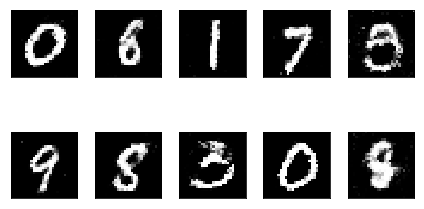

epoch = 62/100, d_loss=0.541, g_loss=1.263                                                                                                     
epoch = 63/100, d_loss=0.551, g_loss=1.339                                                                                                     
epoch = 64/100, d_loss=0.546, g_loss=1.308                                                                                                     
epoch = 65/100, d_loss=0.513, g_loss=1.303                                                                                                     
epoch = 66/100, d_loss=0.587, g_loss=1.173                                                                                                     
epoch = 67/100, d_loss=0.551, g_loss=1.336                                                                                                     
epoch = 68/100, d_loss=0.573, g_loss=1.282                                                                                              

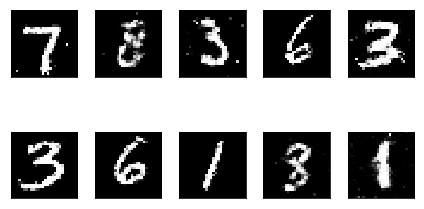

epoch = 72/100, d_loss=0.564, g_loss=1.326                                                                                                     
epoch = 73/100, d_loss=0.558, g_loss=1.319                                                                                                     
epoch = 74/100, d_loss=0.543, g_loss=1.431                                                                                                     
epoch = 75/100, d_loss=0.521, g_loss=1.354                                                                                                     
epoch = 76/100, d_loss=0.501, g_loss=1.394                                                                                                     
epoch = 77/100, d_loss=0.535, g_loss=1.424                                                                                                     
epoch = 78/100, d_loss=0.526, g_loss=1.420                                                                                              

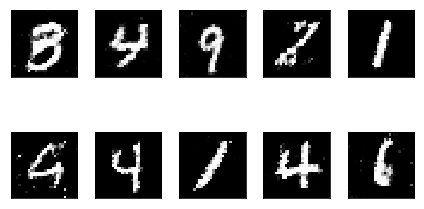

epoch = 82/100, d_loss=0.546, g_loss=1.357                                                                                                     
epoch = 83/100, d_loss=0.533, g_loss=1.546                                                                                                     
epoch = 84/100, d_loss=0.532, g_loss=1.437                                                                                                     
epoch = 85/100, d_loss=0.532, g_loss=1.417                                                                                                     
epoch = 86/100, d_loss=0.546, g_loss=1.593                                                                                                     
epoch = 87/100, d_loss=0.530, g_loss=1.378                                                                                                     
epoch = 88/100, d_loss=0.506, g_loss=1.549                                                                                              

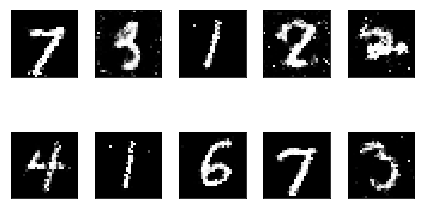

epoch = 92/100, d_loss=0.552, g_loss=1.474                                                                                                     
epoch = 93/100, d_loss=0.517, g_loss=1.349                                                                                                     
epoch = 94/100, d_loss=0.545, g_loss=1.426                                                                                                     
epoch = 95/100, d_loss=0.525, g_loss=1.415                                                                                                     
epoch = 96/100, d_loss=0.518, g_loss=1.615                                                                                                     
epoch = 97/100, d_loss=0.508, g_loss=1.607                                                                                                     
epoch = 98/100, d_loss=0.530, g_loss=1.626                                                                                              

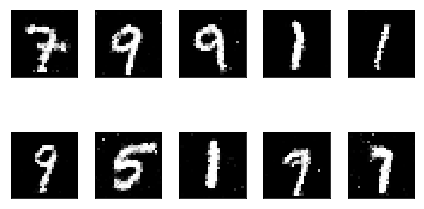

In [0]:
epochs = 100
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        
        # Train Discriminator weights
        discriminator.trainable = True
        
        # Real samples
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))
        
        # Fake Samples
        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)
         
        # Discriminator loss
        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])
        
        # Train Generator weights
        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)
   
        print(
            'epoch = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, i, len(X_train) // batch_size, d_loss_batch, d_g_loss_batch[0]),
            100*' ',
            end='\r'
        )
    
    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print('epoch = %d/%d, d_loss=%.3f, g_loss=%.3f' % (e + 1, epochs, d_loss[-1], d_g_loss[-1]), 100*' ')

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, latent_dim)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

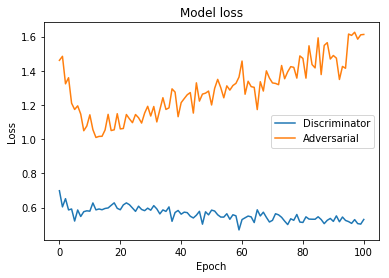

In [0]:
# plotting the metrics
plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Discriminator', 'Adversarial'], loc='center right')
plt.show()